In [13]:
#'S종가', 'H종가', '환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국기준금리', '미국기준금리', '한미기준금리차이', '반도체수출금액지수', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '코스피종가', '코스피고가', '코스피저가', '코스피거래량', '코스피변동', '코스닥종가', '코스닥시가', '코스닥고가', '코스닥저가', '코스닥거래량', '코스닥변동', 'SP종가', 'SP변동률', '시장금리'
!pip install sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
Ldata = pd.read_csv('hynix_short.csv', encoding='euc-kr', index_col = 'date')
Ldata.head()

,S금리대비,H금리대비,S등락,H등락,H등락분류,S종가,S등락률,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,반도체수출금액지수
date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,0,1,0,1,1,795000.0,-0.87,23700.0,200,0.85,...,-0.37,498.49,494.36,499.63,494.36,506010.0,-0.08,1071.25,0.88,88.15
2010-07-20,1,1,1,1,1,798000.0,0.38,23850.0,150,0.63,...,0.28,499.72,501.32,501.64,498.43,686750.0,0.25,1083.48,0.80,88.15
2010-07-21,1,0,1,0,-1,817000.0,2.38,23600.0,-250,-1.05,...,0.69,496.73,502.63,503.08,496.73,721150.0,-0.60,1069.59,1.74,88.15
2010-07-22,0,0,0,0,-1,808000.0,-1.10,22600.0,-1000,-4.24,...,-0.76,484.72,496.47,497.84,482.97,668020.0,-2.42,1093.67,-1.40,88.15
2010-07-23,1,1,1,1,1,811000.0,0.37,23250.0,650,2.88,...,1.30,483.69,490.17,490.65,480.66,532190.0,-0.21,1102.66,1.80,88.15


## 상관계수 확인

In [16]:
#a = pd.Series(Ldata['종가'])
#Ldata['종가'].iloc[1:] = np.diff(a)
#b = pd.Series(Ldata['금리'])
#Ldata['금리'].iloc[1:] = np.diff(b)
#Ldata['종가'] = np.diff(a) #Error occur

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
Ldata = Ldata.drop(['최종','H등락', 'S등락률', 'H등락지표', 'H등락분류','H대비', 'H등락률', 'H시가', 'H고가', 'H저가', 'H거래량', 'H거래대금', 'H시가총액', 'H상장주식수'], axis=1)

In [14]:
data_corr = pd.DataFrame(Ldata).corr(method='pearson')
data_corr.describe()

,S등락,S종가,H종가,환율,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국기준금리,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,시장금리
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.057832,0.344234,0.343858,0.000148,-0.092361,-0.095940,-0.096851,-0.091231,0.050786,-0.224158,...,0.090482,0.316221,0.312820,0.313940,0.315167,0.319860,0.072004,0.319700,0.036839,-0.236943
std,0.201789,0.589195,0.586125,0.327058,0.567165,0.567575,0.569112,0.565911,0.180717,0.634803,...,0.230070,0.609953,0.611011,0.611880,0.609106,0.551023,0.219749,0.625461,0.178856,0.644341
min,-0.039972,-0.804755,-0.797088,-0.580275,-0.724417,-0.725911,-0.730261,-0.719814,-0.043931,-0.863245,...,-0.034108,-0.832261,-0.831337,-0.833384,-0.829931,-0.726547,-0.038312,-0.904983,-0.009039,-0.904983
25%,-0.009582,0.000621,-0.005432,-0.156516,-0.536966,-0.538508,-0.540847,-0.535093,-0.010787,-0.764727,...,-0.003364,0.003322,-0.011212,-0.004715,-0.000234,-0.009455,-0.017615,-0.005123,0.001977,-0.800922
50%,0.005253,0.632005,0.593073,0.061088,-0.273027,-0.276203,-0.280470,-0.269400,0.012359,-0.485152,...,0.023088,0.543440,0.546213,0.547790,0.539657,0.623555,0.012722,0.576907,0.005469,-0.493825
75%,0.016882,0.839856,0.815821,0.169587,0.016267,0.015897,0.015810,0.016615,0.035933,0.006680,...,0.040405,0.819033,0.817606,0.816878,0.820798,0.750075,0.026486,0.863210,0.007747,0.007920
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data_corr

,S등락,S종가,H종가,환율,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국기준금리,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,시장금리
S등락,1.000000,0.019802,0.006829,0.061088,-0.036512,-0.039972,-0.039588,-0.035949,0.042880,-0.020884,...,0.506180,0.006241,-0.000411,-0.000105,0.005253,-0.008884,0.213923,0.013025,0.011534,-0.020825
S종가,0.019802,1.000000,0.956645,0.163512,-0.499446,-0.501408,-0.504756,-0.496420,-0.012258,-0.770151,...,0.040581,0.812591,0.810729,0.813122,0.810394,0.896817,0.024497,0.936919,0.004053,-0.804755
H종가,0.006829,0.956645,1.000000,0.129653,-0.488774,-0.490202,-0.492381,-0.486855,-0.017488,-0.759304,...,0.032532,0.813821,0.811871,0.814935,0.810899,0.882223,0.026140,0.944560,0.002413,-0.797088
환율,0.061088,0.163512,0.129653,1.000000,-0.576779,-0.577097,-0.573704,-0.580275,-0.037694,-0.387619,...,0.049593,0.108216,0.107525,0.111461,0.103726,0.225857,0.021098,0.227325,-0.002288,-0.371746
유가종가,-0.036512,-0.499446,-0.488774,-0.576779,1.000000,0.997296,0.998306,0.999214,0.094553,0.846059,...,-0.010459,-0.603535,-0.602730,-0.605328,-0.600287,-0.465765,-0.018362,-0.632353,0.002095,0.842336
유가오픈,-0.039972,-0.501408,-0.490202,-0.577097,0.997296,1.000000,0.999132,0.998101,0.046084,0.848094,...,-0.017777,-0.606773,-0.605710,-0.608342,-0.603361,-0.467729,-0.022090,-0.634119,0.002128,0.844145
유가고가,-0.039588,-0.504756,-0.492381,-0.573704,0.998306,0.999132,1.000000,0.997732,0.046981,0.851451,...,-0.015101,-0.610722,-0.609791,-0.612306,-0.607551,-0.467681,-0.020809,-0.637714,0.001770,0.847481
유가저가,-0.035949,-0.496420,-0.486855,-0.580275,0.999214,0.998101,0.997732,1.000000,0.096248,0.842709,...,-0.009618,-0.600075,-0.599280,-0.601957,-0.596634,-0.466339,-0.016869,-0.628895,0.002387,0.839086
유가변동률,0.042880,-0.012258,-0.017488,-0.037694,0.094553,0.046084,0.046981,0.096248,1.000000,0.023983,...,0.061645,0.011797,0.010633,0.009945,0.012359,-0.033211,0.025625,-0.012106,0.010001,0.025856
한국기준금리,-0.020884,-0.770151,-0.759304,-0.387619,0.846059,0.848094,0.851451,0.842709,0.023983,1.000000,...,-0.034108,-0.811312,-0.810287,-0.811799,-0.809569,-0.702272,-0.019324,-0.863245,-0.005681,0.987173


c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1584x1584 with 0 Axes>

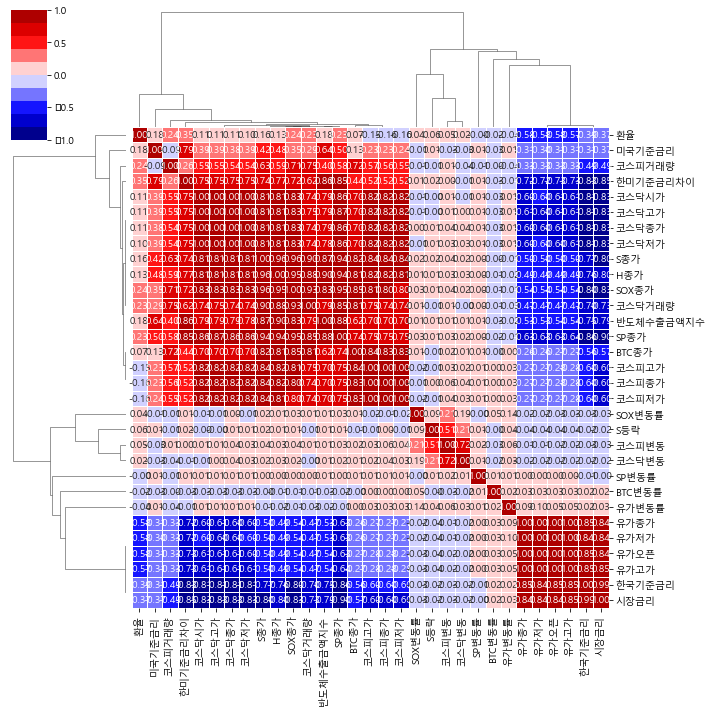

In [16]:
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

In [2]:
ser = pd.read_csv('hinix_short3.csv', encoding='euc-kr', index_col = 'date')
ser.head()

,등락.분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이,날짜,반도체수출금액지수
date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,2,25750.0,1650,6.85,24700.0,26450,24200,9275920,2.360000e+11,8.990000e+12,...,25.55,25.20,25.69,24.71,-0.20,4.75,5.5,0.75,1,34.27
2000-01-05,-2,23100.0,-2650,-10.29,24150.0,24950,22750,7414370,1.780000e+11,8.060000e+12,...,24.91,25.50,25.61,24.87,-2.50,4.75,5.5,0.75,1,34.27
2000-01-06,-2,21900.0,-1200,-5.19,23500.0,23800,21650,6529140,1.480000e+11,7.640000e+12,...,24.78,24.80,25.34,24.51,-0.52,4.75,5.5,0.75,1,34.27
2000-01-07,-1,21700.0,-200,-0.91,21200.0,22400,20800,10492270,2.280000e+11,1.070000e+13,...,24.22,24.65,25.00,24.15,-2.26,4.75,5.5,0.75,1,34.27
2000-01-10,-1,21500.0,-200,-0.92,22000.0,22300,21500,8041690,1.750000e+11,1.060000e+13,...,24.67,24.22,24.75,24.02,1.86,4.75,5.5,0.75,1,34.27


In [7]:
data_corr = pd.DataFrame(ser).corr(method='pearson')
data_corr.describe()

,등락.분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이,날짜,반도체수출금액지수
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.143948,0.118743,0.139003,0.136456,0.172828,0.174663,0.174381,0.001957,0.117868,0.167881,...,0.125702,0.123260,0.123631,0.125708,0.055613,-0.082142,-0.003208,0.074395,0.053307,0.051222
std,0.298188,0.272003,0.297029,0.293627,0.459836,0.459284,0.459268,0.336356,0.264244,0.457082,...,0.449978,0.450556,0.450534,0.449942,0.212660,0.413203,0.339883,0.360846,0.215464,0.212536
min,-0.055970,-0.030301,-0.046423,-0.030379,-0.723480,-0.722690,-0.724889,-0.302817,-0.220406,-0.768017,...,-0.491486,-0.490709,-0.487616,-0.494805,-0.025186,-0.768017,-0.343248,-0.350035,-0.076714,-0.017351
25%,0.007796,-0.001853,-0.001712,-0.000643,-0.023062,-0.020277,-0.020490,-0.282636,-0.031556,-0.018091,...,-0.092102,-0.092542,-0.091833,-0.093041,-0.009562,-0.121784,-0.231648,-0.220638,-0.017108,-0.004304
50%,0.026916,0.000193,0.009128,0.011067,0.052170,0.055901,0.056481,-0.003538,0.029562,0.056051,...,0.017214,0.009216,0.012663,0.016970,0.007076,-0.052586,-0.040994,0.002677,0.007980,0.004699
75%,0.045979,0.039467,0.038128,0.045871,0.303860,0.307388,0.299939,0.042342,0.260306,0.291179,...,0.111842,0.112295,0.112277,0.112137,0.036446,-0.004303,-0.001506,0.349194,0.034065,0.012896
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1584x1584 with 0 Axes>

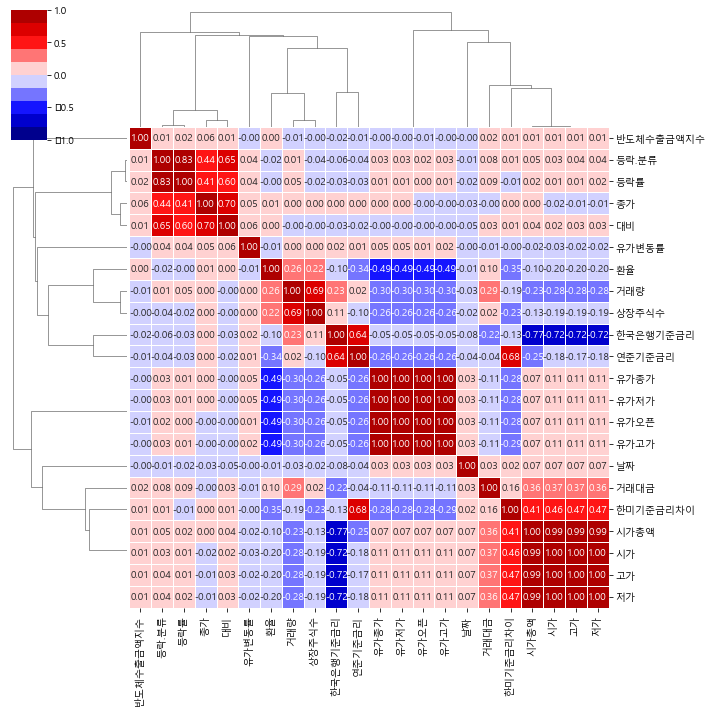

In [8]:
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

In [3]:
df = pd.read_csv('hinix_short.csv',index_col=0,parse_dates=[0], dayfirst=False,infer_datetime_format=True,encoding='cp949')

In [8]:
data_corr = pd.DataFrame(df).corr(method='pearson')
data_corr.describe()

,등락지표,등락 분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,...,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이,반도체수출금액지수,삼성종가
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.187784,0.196391,0.148398,0.188024,0.175120,0.204713,0.206981,0.206890,-0.008662,0.126906,...,0.125871,0.123312,0.123749,0.125927,0.056461,-0.113713,-0.017059,0.086631,0.189866,0.138859
std,0.323469,0.336011,0.278138,0.315918,0.308414,0.476355,0.475506,0.475547,0.333902,0.259439,...,0.439855,0.440496,0.440447,0.439812,0.207899,0.431794,0.338712,0.357618,0.468780,0.254943
min,-0.056256,-0.055970,-0.016688,-0.031743,-0.030379,-0.723480,-0.722690,-0.724889,-0.302817,-0.220406,...,-0.491486,-0.490709,-0.487616,-0.494805,-0.027926,-0.816993,-0.343248,-0.350035,-0.816993,-0.029102
25%,0.017100,0.018615,-0.000562,-0.000962,0.004834,-0.020937,-0.016060,-0.016252,-0.282621,-0.025064,...,-0.078917,-0.079235,-0.078607,-0.079692,-0.011722,-0.175188,-0.253121,-0.210810,-0.014140,-0.009098
50%,0.036435,0.036015,0.000267,0.023392,0.014668,0.036435,0.043912,0.045191,0.000888,0.058627,...,0.023919,0.014267,0.019822,0.024088,0.014267,-0.052623,-0.038049,0.005246,0.039663,0.023188
75%,0.204147,0.217984,0.226084,0.319182,0.211788,0.416290,0.419223,0.413634,0.035720,0.283977,...,0.112394,0.112830,0.112792,0.112710,0.043295,-0.014528,-0.007850,0.386251,0.317771,0.199681
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1584x1584 with 0 Axes>

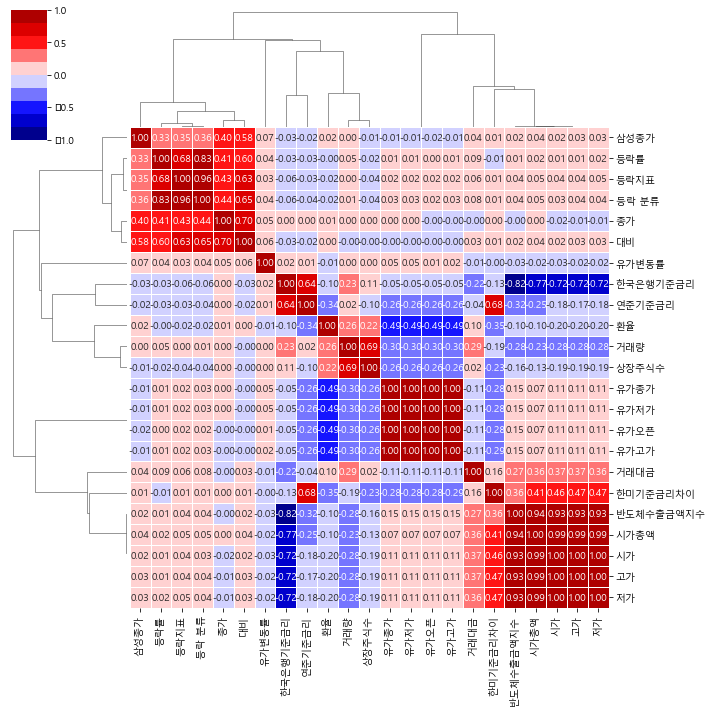

In [9]:
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

In [7]:
a = pd.Series(df['종가'])
df['종가'].iloc[1:] = np.diff(a)
b = pd.Series(df['삼성종가'])
df['삼성종가'].iloc[1:] = np.diff(b)
#df['종가'] = np.diff(a) #Error occur

## 차원축소

In [30]:
Sdata = pd.read_csv('hynix_short.csv',index_col=0,parse_dates=[0], dayfirst=False,infer_datetime_format=True,encoding='cp949')
Sdata.head()

,최종,S등락,H등락,S등락률,H등락지표,H등락분류,S종가,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,시장금리
date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,0,0,1,-0.87,1,1,795000,23700,200,0.85,...,-0.37,498.49,494.36,499.63,494.36,506010,-0.08,1071.25,0.88,2.54
2010-07-20,0,1,1,0.38,1,1,798000,23850,150,0.63,...,0.28,499.72,501.32,501.64,498.43,686750,0.25,1083.48,0.80,2.54
2010-07-21,0,1,0,2.38,-1,-1,817000,23600,-250,-1.05,...,0.69,496.73,502.63,503.08,496.73,721150,-0.60,1069.59,1.74,2.54
2010-07-22,0,0,0,-1.10,-1,-1,808000,22600,-1000,-4.24,...,-0.76,484.72,496.47,497.84,482.97,668020,-2.42,1093.67,-1.40,2.54
2010-07-23,0,1,1,0.37,1,1,811000,23250,650,2.88,...,1.30,483.69,490.17,490.65,480.66,532190,-0.21,1102.66,1.80,2.54


In [31]:
print(Sdata.isna().sum())
print(Sdata.shape)
print(list(Sdata.columns))

최종           0
S등락          0
H등락          0
S등락률         0
H등락지표        0
H등락분류        0
S종가          0
H종가          0
H대비          0
H등락률         0
H시가          0
H고가          0
H저가          0
H거래량         0
H거래대금        0
H시가총액        0
H상장주식수       0
환율           0
유가종가         0
유가오픈         0
유가고가         0
유가저가         0
유가변동률        0
한국기준금리       0
미국기준금리       0
한미기준금리차이     0
반도체수출금액지수    9
SOX종가        0
SOX변동률       0
BTC종가        0
BTC변동률       0
코스피종가        0
코스피고가        0
코스피저가        0
코스피거래량       0
코스피변동        0
코스닥종가        0
코스닥시가        0
코스닥고가        0
코스닥저가        0
코스닥거래량       0
코스닥변동        0
SP종가         0
SP변동률        0
시장금리         0
dtype: int64
(2670, 45)
['최종', 'S등락', 'H등락', 'S등락률', 'H등락지표', 'H등락분류', 'S종가', 'H종가', 'H대비', 'H등락률', 'H시가', 'H고가', 'H저가', 'H거래량', 'H거래대금', 'H시가총액', 'H상장주식수', '환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국기준금리', '미국기준금리', '한미기준금리차이', '반도체수출금액지수', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '코스피종가', '코스피고가', '코스피저가', '코스피거래량', '

In [32]:
Sdata = Sdata.dropna(axis=0)

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Sdata.drop(['S등락'], axis=1))

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


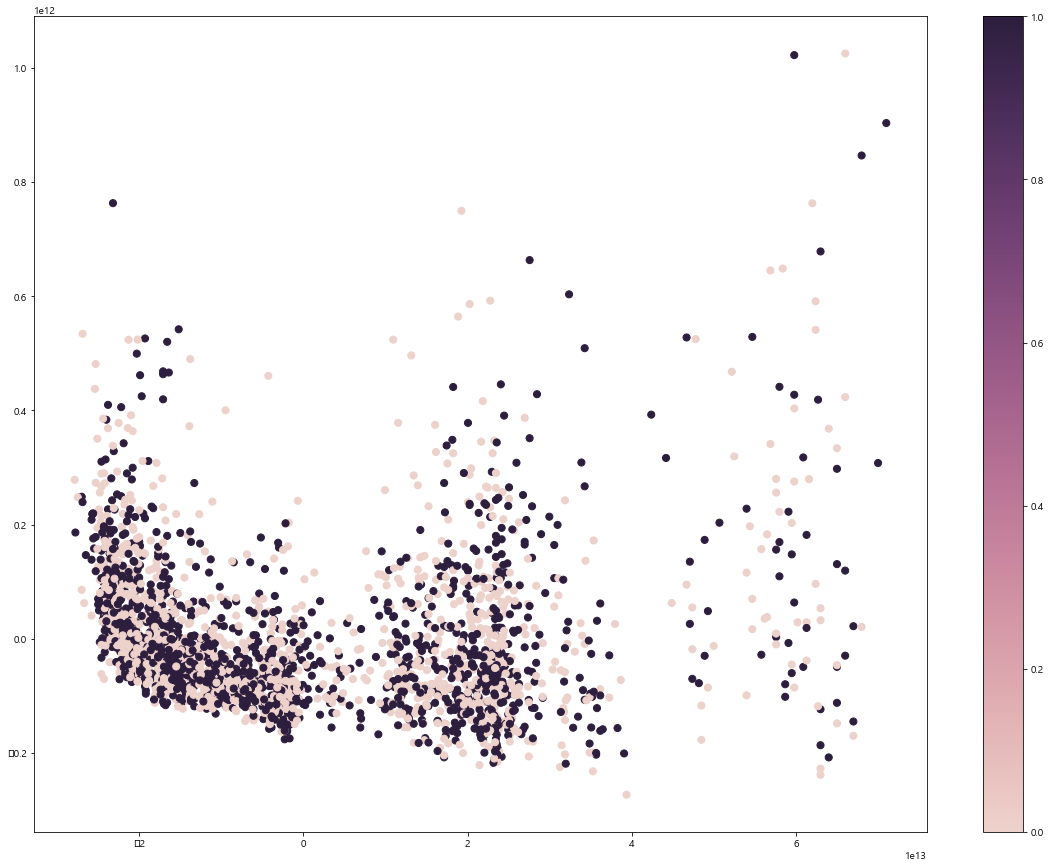

In [23]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca_result[:,0], pca_result[:,1], c=Sdata['S등락'], s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [24]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(Sdata.drop(['S등락'], axis=1))

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


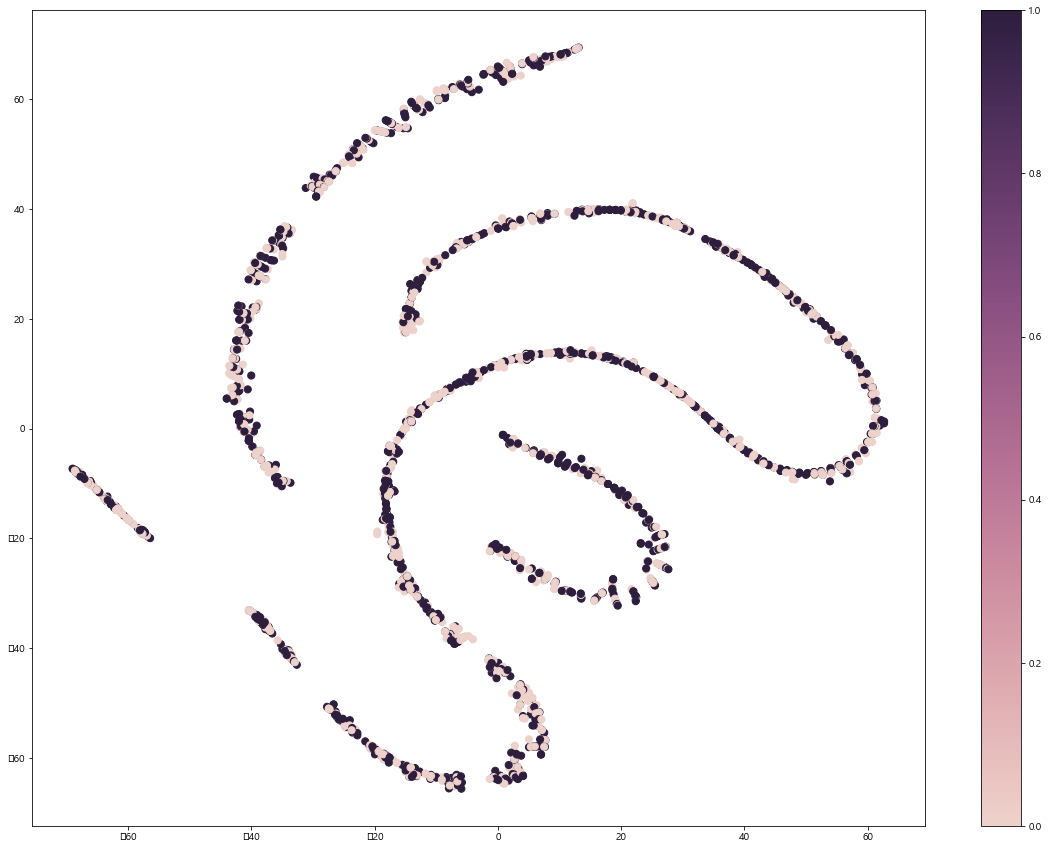

In [25]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['S등락'], s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## Min-Max-Scailing

In [26]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(Sdata)

output = min_max_scaler.transform(Sdata)
output = pd.DataFrame(output, columns = Sdata.columns, index=list(Sdata.index.values))
output.head()

,최종,S등락,H등락,S등락률,H등락지표,H등락분류,S종가,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,시장금리
2010-07-19,0.0,0.0,1.0,0.387358,1.0,0.75,0.029716,0.060948,0.378788,0.485714,...,0.472042,0.142915,0.118507,0.110479,0.144580,0.000057,0.556193,0.007594,0.604607,0.777027
2010-07-20,0.0,1.0,1.0,0.454889,1.0,0.75,0.030491,0.062077,0.376263,0.477551,...,0.510300,0.144891,0.129934,0.113833,0.151132,0.000093,0.571975,0.011459,0.600846,0.777027
2010-07-21,0.0,1.0,0.0,0.562939,0.0,0.25,0.035401,0.060196,0.356061,0.415213,...,0.534432,0.140086,0.132084,0.116236,0.148395,0.000100,0.531325,0.007070,0.645040,0.777027
2010-07-22,0.0,0.0,0.0,0.374932,0.0,0.25,0.033075,0.052671,0.318182,0.296846,...,0.449088,0.120788,0.121971,0.107492,0.126244,0.000089,0.444285,0.014680,0.497414,0.777027
2010-07-23,0.0,1.0,1.0,0.454349,1.0,0.75,0.033850,0.057562,0.401515,0.561039,...,0.570335,0.119133,0.111627,0.095492,0.122525,0.000063,0.549976,0.017521,0.647861,0.777027


In [27]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(output.drop(['S등락'], axis=1))

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


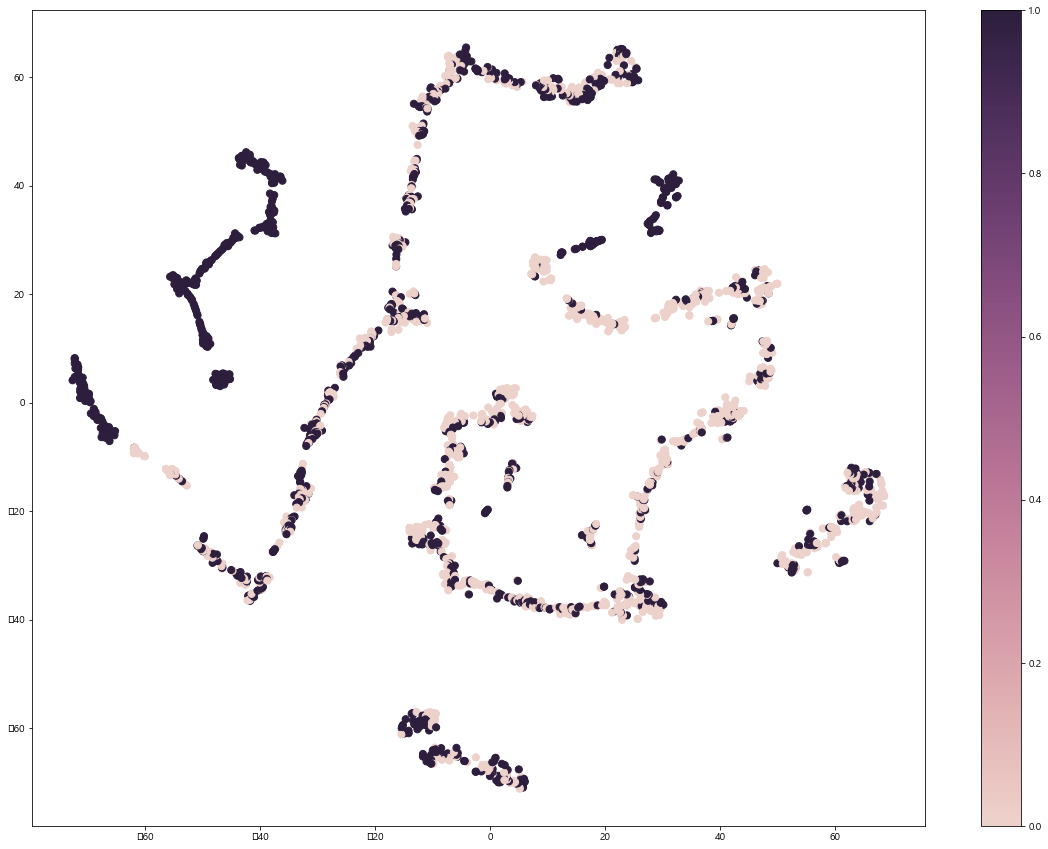

In [28]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['S등락'], s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## Standarization

In [33]:
std_scaler = StandardScaler()
fitted = std_scaler.fit(Sdata)

output = std_scaler.transform(Sdata)
output = pd.DataFrame(output, columns = Sdata.columns, index=list(Sdata.index.values))
output.head()

,최종,S등락,H등락,S등락률,H등락지표,H등락분류,S종가,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,시장금리
2010-07-19,-0.46136,-1.002634,1.006409,-0.546535,0.988398,0.921931,-1.261665,-1.008235,0.115355,0.315242,...,-0.380995,-1.071162,-1.115491,-1.089526,-1.084088,-0.639932,-0.085524,-1.542584,0.772666,0.876871
2010-07-20,-0.46136,0.997373,1.006409,0.175555,0.988398,0.921931,-1.257820,-1.002868,0.079470,0.223677,...,0.241438,-1.061633,-1.061462,-1.074057,-1.052152,-0.639664,0.160758,-1.525552,0.699486,0.876871
2010-07-21,-0.46136,0.997373,-0.993632,1.330899,-1.050460,-0.992434,-1.233469,-1.011814,-0.207609,-0.475546,...,0.634049,-1.084797,-1.051292,-1.062975,-1.065491,-0.639613,-0.473605,-1.544895,1.559349,0.876871
2010-07-22,-0.46136,-1.002634,-0.993632,-0.679399,-1.050460,-0.992434,-1.245004,-1.047596,-0.745881,-1.803236,...,-0.754454,-1.177841,-1.099111,-1.103301,-1.173464,-0.639692,-1.831887,-1.511362,-1.312959,0.876871
2010-07-23,-0.46136,0.997373,1.006409,0.169778,0.988398,0.921931,-1.241159,-1.024337,0.438318,1.160136,...,1.218178,-1.185820,-1.148017,-1.158633,-1.191591,-0.639893,-0.182544,-1.498843,1.614234,0.876871


In [34]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(output.drop(['S등락'], axis=1))

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


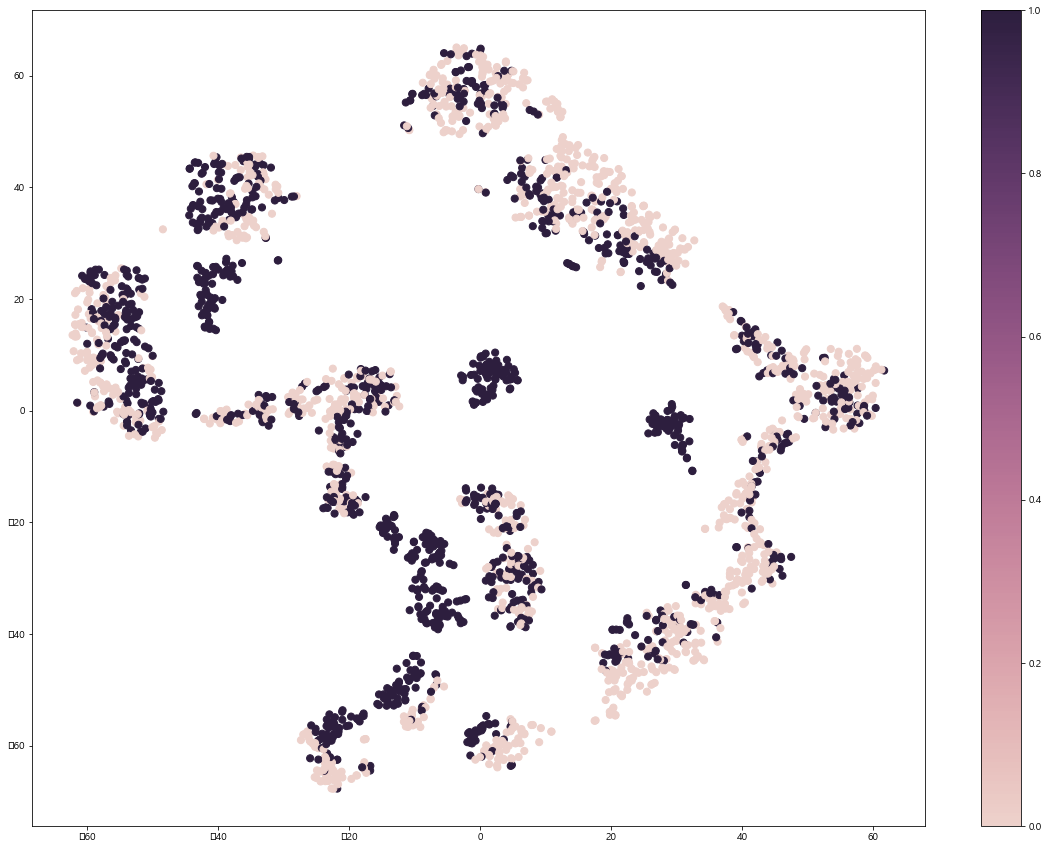

In [35]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['S등락'], s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## 종속변수 분포 확인

<AxesSubplot:title={'center':'등락 분류'}>

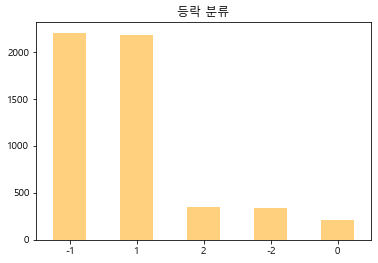

In [80]:
ax = Sdata['등락 분류'].value_counts()
ax.plot(kind='bar',  title="등락 분류", color='orange', alpha=0.5, rot=1)

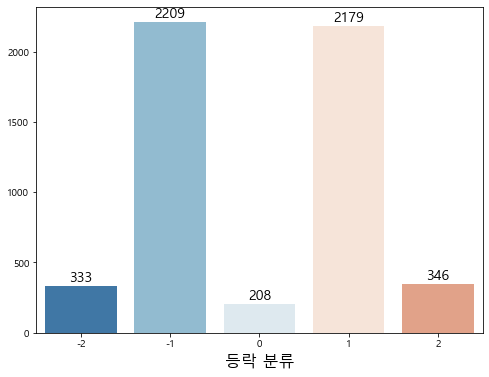

In [131]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("RdBu_r")
plots = sns.countplot(x="등락 분류", data=Sdata, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')


plt.xlabel("등락 분류", size=16)
plt.ylabel("", size=0)
plt.show()

## 2020년 3월 23일 포스트 코로나 종속변수 분포 확인

In [14]:
df = Sdata.loc["2020-03-23":]
df.head()

,등락지표,등락 분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,...,상장주식수,환율,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이
날짜,,,,,,,,,,,,,,,,,,,,,
2020-03-23,-1,-2,69400,-5400,-7.22,69700,71600,68000,8192363,5.710000e+11,...,728002365,1254.1,23.36,22.52,24.07,20.80,4.15,1.25,0.25,-1.0
2020-03-24,1,2,78700,9300,13.40,73000,78800,72100,7247345,5.490000e+11,...,728002365,1274.6,24.01,23.87,25.16,23.09,2.78,1.25,0.25,-1.0
2020-03-25,1,2,84500,5800,7.37,82000,84700,79800,8787217,7.240000e+11,...,728002365,1256.0,24.49,24.37,25.24,22.91,2.00,1.25,0.25,-1.0
2020-03-26,-1,-1,80700,-3800,-4.50,85000,87900,80400,7895289,6.660000e+11,...,728002365,1230.7,22.60,24.25,24.65,22.38,-7.72,1.25,0.25,-1.0
2020-03-27,1,1,83300,2600,3.22,85700,85700,80500,8085695,6.730000e+11,...,728002365,1227.9,21.51,23.29,23.44,20.88,-4.82,1.25,0.25,-1.0


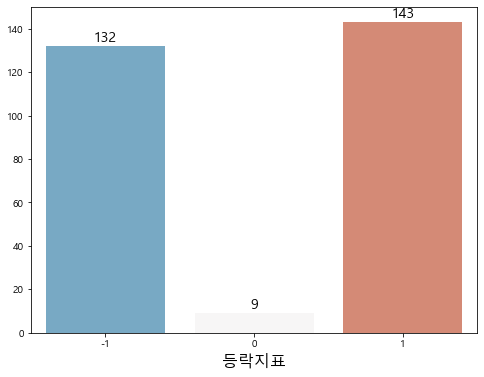

In [21]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("RdBu_r",3)
plots = sns.countplot(x="등락지표", data=df, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')

plt.xlabel("등락지표", size=16)
plt.ylabel("", size=0)
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46973 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s

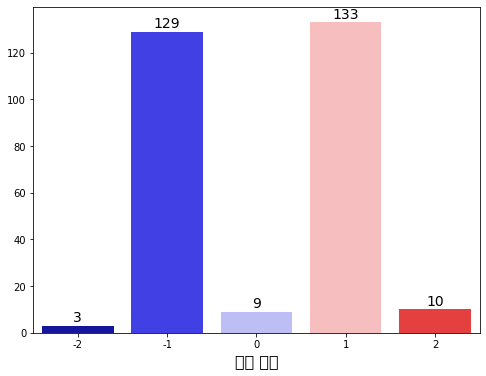

In [27]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("seismic")
plots = sns.countplot(x="등락 분류", data=df, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')


plt.xlabel("등락 분류", size=16)
plt.ylabel("", size=0)
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()